In [1]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
%run -i ../../bench.py

In [3]:
data_50_path = os.path.join('data_50.json')
data_100_path = os.path.join('data_100.json')
data_300_path = os.path.join('data_300.json')
data_600_path = os.path.join('data_600.json')
data_1000_path = os.path.join('data_1000.json')

In [4]:
def mode_within(data_array, percent):
    max_sum_freq = 0
    mode = data_array[0]

    for check_val in set(data_array):
        sum_freq = sum(1 for ele in data_array if abs(ele - check_val) <= abs(percent * check_val / 100))

        if sum_freq > max_sum_freq:
            mode = check_val
            max_sum_freq = sum_freq

    return mode
def gen_param_func(data_tensor_array):
    # for 1 column, just have 1 element in tensor array
    data = data_tensor_array[0].reshape(-1).numpy()
    return [torch.tensor(mode_within(data,1))]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            count_equal = torch.sum((torch.abs(X-self.w)<=torch.abs(0.01*self.w)).double())
            result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
            return (torch.sum(result) == X.size()[1], self.w)

    return verifier_model

sm_time =[0,0,0,0,0]
med_time = [0,0,0,0,0]
lar_time = [0,0,0,0,0]

Summary of Proving Time (1% accuracy)

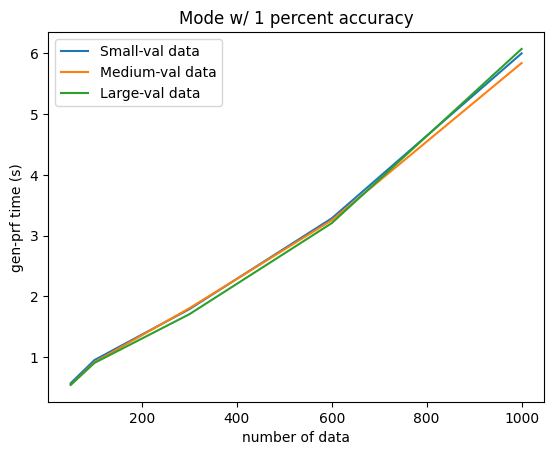

In [21]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
# sm_time = [0.5686647891998291, 0.9327430725097656, 1.8243849277496338, 3.2371439933776855, 6.038832902908325]
plt.title("Mode w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

# med_time = [0.5626211166381836, 0.9744749069213867, 1.7960751056671143, 3.3007750511169434, 6.14612078666687]
plt.plot(data_number, med_time, label = 'Medium-val data')

# lar_time = [0.5944938659667969, 0.9927859306335449, 1.7916460037231445, 3.241201877593994, 5.985101699829102]
plt.plot(data_number, lar_time, label = 'Large-val data')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [5]:
sm_time[0] = bench_one(data_50_path,['small'], model_func,gen_param_func, "50 small values","default",12, "resources")

=====================================  50 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 50, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlet

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.5685079097747803
Theory result:  tensor(0.9380, dtype=torch.float64)
Our result:  [0.9375]


In [6]:
sm_time[1] = bench_one(data_100_path,['small'], model_func,gen_param_func, "100 small values","default",13, "resources")

=====================================  100 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 100, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outle

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9487879276275635
Theory result:  tensor(0.8120, dtype=torch.float64)
Our result:  [0.8125]


In [7]:
sm_time[2] = bench_one(data_300_path,['small'], model_func,gen_param_func, "300 small values","default",14, "resources")

=====================================  300 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 300, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'out

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.788161039352417
Theory result:  tensor(0.8190, dtype=torch.float64)
Our result:  [0.818359375]


In [8]:
sm_time[3] = bench_one(data_600_path,['small'], model_func,gen_param_func, "600 small values","default",15, "resources")

=====================================  600 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 600, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'out

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.284083127975464
Theory result:  tensor(0.8150, dtype=torch.float64)
Our result:  [0.814453125]


In [9]:
sm_time[4] = bench_one(data_1000_path,['small'], model_func,gen_param_func, "1000 small values","default",16, "resources")

=====================================  1000 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 1000, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'ou

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  6.00144100189209
Theory result:  tensor(0.8130, dtype=torch.float64)
Our result:  [0.8125]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [10]:
# can use "default" which will set to scale 8, which results in similar circuit size to scale = 3
med_time[0] = bench_one(data_50_path,['medium'], model_func,gen_param_func, "50 medium values","default",12, "resources")

=====================================  50 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 50, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlet

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.5578739643096924
Theory result:  tensor(88.7000, dtype=torch.float64)
Our result:  [88.69921875]


In [12]:
med_time[1] = bench_one(data_100_path,['medium'], model_func,gen_param_func, "100 medium values","default",13, "resources")

=====================================  100 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 100, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outle

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9125277996063232
Theory result:  tensor(88.1000, dtype=torch.float64)
Our result:  [88.099609375]


In [13]:
med_time[2] = bench_one(data_300_path,['medium'], model_func,gen_param_func, "300 medium values","default",14, "resources")

=====================================  300 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 300, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'out

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.8032641410827637
Theory result:  tensor(51.9000, dtype=torch.float64)
Our result:  [51.900390625]


In [14]:
med_time[3] = bench_one(data_600_path,['medium'], model_func,gen_param_func, "600 medium values","default",15, "resources")

=====================================  600 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 600, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'out

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.252258062362671
Theory result:  tensor(88.1000, dtype=torch.float64)
Our result:  [88.099609375]


In [15]:
med_time[4] = bench_one(data_1000_path,['medium'], model_func,gen_param_func, "1000 medium values","default",16, "resources")

=====================================  1000 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 1000, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'ou

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.8424177169799805
Theory result:  tensor(88.9000, dtype=torch.float64)
Our result:  [88.900390625]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [16]:
lar_time[0] = bench_one(data_50_path,['large'], model_func,gen_param_func, "50 large values","default",12, "resources")

=====================================  50 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 50, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 12, 'num_inner_cols': 2, 'va

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2
spawning module 0
spawning 

gen prf time:  0.5415968894958496
Theory result:  tensor(770., dtype=torch.float64)
Our result:  [770.0]


In [17]:
lar_time[1] = bench_one(data_100_path,['large'], model_func,gen_param_func, "100 large values","default",13, "resources")

=====================================  100 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 100, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outle

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9024622440338135
Theory result:  tensor(816., dtype=torch.float64)
Our result:  [816.0]


In [18]:
lar_time[2] = bench_one(data_300_path,['large'], model_func,gen_param_func, "300 large values","default",14, "resources")

=====================================  300 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 300, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'out

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.7042810916900635
Theory result:  tensor(692., dtype=torch.float64)
Our result:  [692.0]


In [19]:
lar_time[3] = bench_one(data_600_path,['large'], model_func,gen_param_func, "600 large values","default",15, "resources")

=====================================  600 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 600, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'out

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.2047202587127686
Theory result:  tensor(818., dtype=torch.float64)
Our result:  [818.0]


In [20]:
lar_time[4] = bench_one(data_1000_path,['large'], model_func,gen_param_func, "1000 large values","default",16, "resources")

=====================================  1000 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_46927/4162048702.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 1000, 'total_const_size': 0, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': [], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [0, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'ou

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  6.074612140655518
Theory result:  tensor(888., dtype=torch.float64)
Our result:  [888.0]
